# Exploratory Data Analysis
Structural Products

In [1]:
#dependencies for EDA
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Importing Dataframes for Exploration

In [2]:
path = "./datasets/"
#check location of files
os.getcwd()

'/Users/jacosta3/OneDrive - University of South Florida/Gerdau Projects/pft/submission'

In [3]:
#structural_dataset: inventory, production, orders and shipments per size/block
structural = pd.read_csv(path+"structural_merged.csv")
#market_indicators: 
indicators = pd.read_excel(path+"market_indicators.xlsx",sheet_name='simplified')
#merged monthly/weekly
monthly = pd.read_csv(path+"structuralmonthly_with_indicators.csv")
weekly = pd.read_csv(path+"structuralweekly_with_indicators.csv")

In [4]:
#Changing data types
structural.calendar_day = structural.calendar_day.astype('datetime64')
structural.year = structural.year.astype('object')
structural.month = structural.month.astype('category')
structural.week = structural.week.astype('category')
#Weekly dtypes
weekly.calendar_day = weekly.calendar_day.astype('datetime64')
#Monthly dtypes
monthly.calendar_day = monthly.calendar_day.astype('datetime64')

## Shipments

### Total Yearly Shipments

Text(0.5, 0, 'Tons')

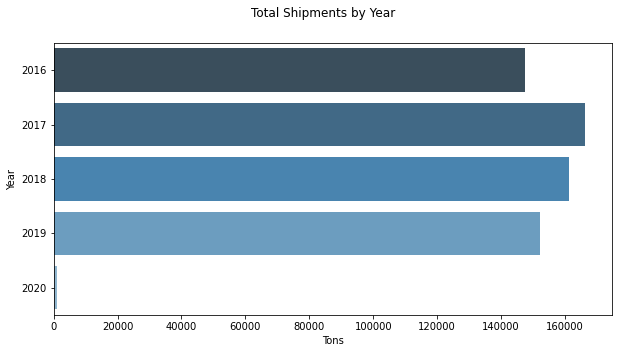

In [5]:
#set fig
fig_dims = (10,5)
fig, ax =plt.subplots(figsize=fig_dims)
fig.suptitle("Total Shipments by Year")

#countplot
sns.barplot(y=[2016,2017,2018,2019,2020], x="shipment_tons", 
            data=structural.resample('Y',on='calendar_day').sum().reset_index(),
            ax=ax, orient="h", palette="Blues_d")
ax.set_ylabel("Year")
ax.set_xlabel("Tons")

### Distribution of Shipments

#### Weekly

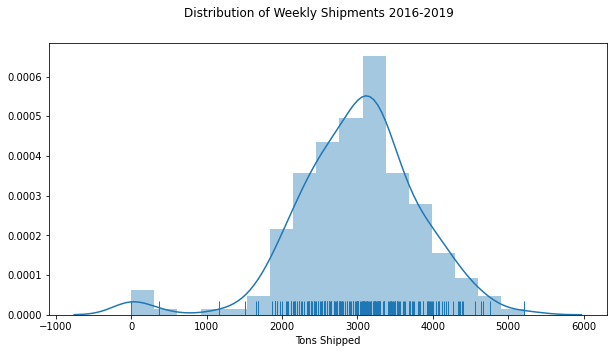

In [6]:
#Weekly Shipment Distribution

#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Weekly Shipments 2016-2019")
#Plotting fig
sns.distplot(structural.resample('W',on='calendar_day').sum().reset_index()['shipment_tons'], rug=True, axlabel="Tons Shipped", ax=ax)

In [7]:
#Stats of Distribution
print("Statistics of Weekly Shipments")
print(structural.resample("W", on="calendar_day").sum()['shipment_tons'].describe())
print("Skew measure:", sp.stats.skew(structural.resample("W", on="calendar_day").sum()['shipment_tons']))
print("Kurtosis measure:", sp.stats.kurtosis(structural.resample("W", on="calendar_day").sum()['shipment_tons'],fisher=False))

Statistics of Weekly Shipments
count     210.000000
mean     2991.719048
std       826.016771
min         0.000000
25%      2534.000000
50%      3050.500000
75%      3468.750000
max      5216.000000
Name: shipment_tons, dtype: float64
Skew measure: -0.7815987016981555
Kurtosis measure: 5.320803159500915


High Kurtosis, while relatively normal skewness seems to indicate heavy tails 

#### Monthly

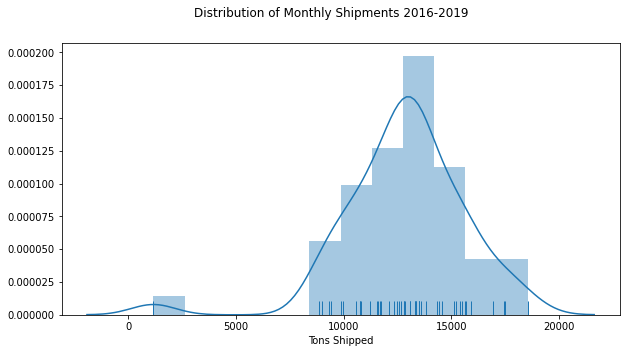

In [8]:
#Monthly Shipment Distribution

#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Monthly Shipments 2016-2019")
#Plotting fig
sns.distplot(structural.resample('M',on='calendar_day').sum().reset_index()['shipment_tons'], rug=True, axlabel="Tons Shipped", ax=ax)

In [9]:
#Stats Monthly Distribution
print("Statistics of Weekly Shipments")
print(structural.resample("M", on="calendar_day").sum()['shipment_tons'].describe())
print("Skew measure:", sp.stats.skew(structural.resample("M", on="calendar_day").sum()['shipment_tons']))
print("Kurtosis measure:", sp.stats.kurtosis(structural.resample("M", on="calendar_day").sum()['shipment_tons'],fisher=False))

Statistics of Weekly Shipments
count       49.000000
mean     12821.653061
std       2845.248126
min       1162.000000
25%      11564.000000
50%      13060.000000
75%      14416.000000
max      18543.000000
Name: shipment_tons, dtype: float64
Skew measure: -1.1659350470470122
Kurtosis measure: 7.185241636366115


High Kurtosis, while left tail skewness seems to have increased when we aggregate monthly (we do know that outliers may be present due to tariffs or other economic uncertainty). Need to be looked at more closely  

### Trends 

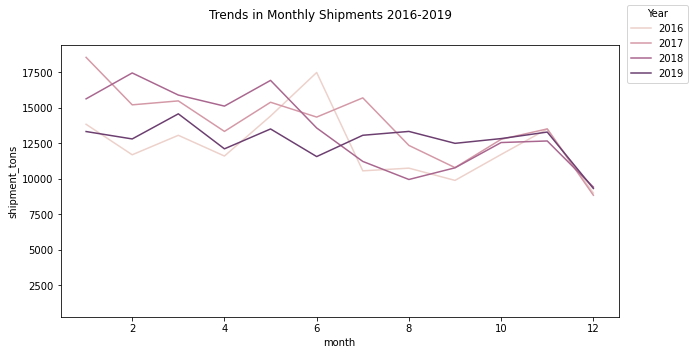

In [10]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Monthly Shipments 2016-2019")

#Plotting fig
sns.lineplot(x='month',
             y='shipment_tons',hue='year', 
             data= structural.groupby(['year','month']).sum().reset_index(),legend=False)

fig.legend(title='Year', labels=[2016,2017,2018,2019])

Seems to be a decreasing trend in shipments towards the end of the year

## Breakdown of Blocks

In [11]:
total_blocks = pd.DataFrame(weekly.groupby(['block'])['production_tons'].sum().sort_values(ascending=False))
total_blocks = total_blocks[:23] #pick those with real(positive) production, others were outsourced

In [12]:
#top 16 out of 75
top16 = total_blocks[:-7]
#Create other categories anything less than 15K tons, bottom out 75
bottom7 = pd.Series(total_blocks[-7:].sum()).rename(index="Other", axis=0)
# bottom7 = pd.Series(bottom19)
total_blocks = top16.append(bottom7)

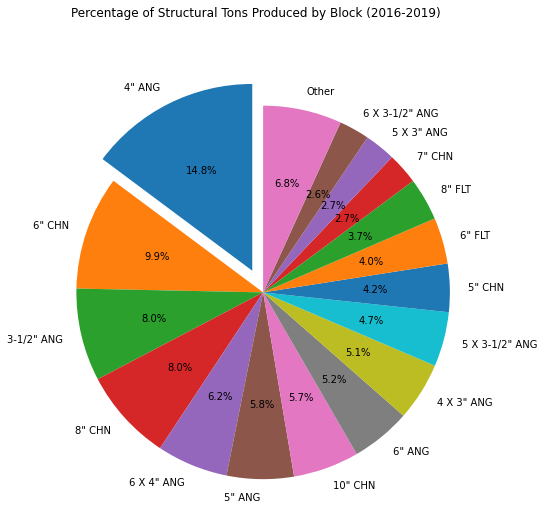

In [13]:
#PieChart by Block
fig_dims = (8,8)
fig, ax1 = plt.subplots(figsize=fig_dims)
fig.suptitle("Percentage of Structural Tons Produced by Block (2016-2019)")
explode = [0 for block in range(17)]
explode[0] = 0.13

#Create plot & title
ax1.pie(total_blocks, labels=total_blocks.index, autopct='%1.1f%%', shadow=False, startangle=90, explode=explode)
ax1.axis('equal')

plt.show()
#blocks near 4" ANG (requested by business): 5X3-1/2", 5X3", FT, 4X3" and 3-1/2" 

Our main sample data set will be 4" ANG

## Correlated Variables 

In [14]:
#Correlation between other variables and shipment_tons
corr_matrix = weekly.corr()
corr_matrix['shipment_tons'].sort_values(ascending=False)

shipment_tons                 1.000000
inventory_tons                0.785509
sale_order_tons               0.771508
production_tons               0.161890
carbon_bar_ship_canada        0.022465
structural_ship_canada        0.013702
carbon_bar_ship_usa           0.010359
structural_ship_usa          -0.000100
global_steel_utilization     -0.004762
year                         -0.004773
ism_non_manufacturing        -0.007355
ism_manufacturing            -0.007804
chicago_scrap$ST             -0.011650
fed_construction$B           -0.014238
state_local_construction$B   -0.022844
month                        -0.037646
Name: shipment_tons, dtype: float64

Given this information we are going to focus our analysis with absolute correlations greater than absolute 2%

## Internal Features
Production, Inventory, Orders, Shipments

In [15]:
#Weekly distribution of internal numbers
weekly.resample('W', on='calendar_day').sum()[['inventory_tons','production_tons','sale_order_tons','shipment_tons']].describe()

,inventory_tons,production_tons,sale_order_tons,shipment_tons
count,210.000000,210.000000,210.000000,210.000000
mean,101595.328421,2776.314286,2912.764714,2991.719048
std,25394.322485,1109.323703,909.973900,826.016771
min,17833.234000,-148.000000,103.366500,0.000000
25%,87567.690756,2308.000000,2253.413500,2534.000000
50%,97007.262605,2932.000000,2838.499500,3050.500000
75%,113593.332597,3499.000000,3521.321375,3468.750000
max,198959.258774,4943.000000,6650.662000,5216.000000


### Production

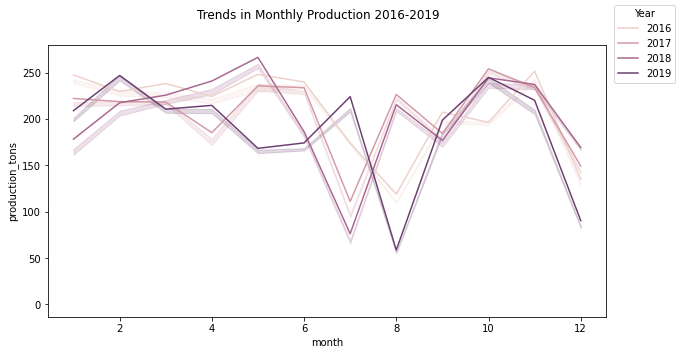

In [16]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Monthly Production 2016-2019")

#Plotting fig
sns.lineplot(x='month',
             y='production_tons',hue='year', 
             data=monthly,legend=False,ci=2)

fig.legend(title='Year', labels=[2016,2017,2018,2019])

Trends in production seems to decrease during the summer. This is due to regular shutdowns for maintainance scheduled around those summer months

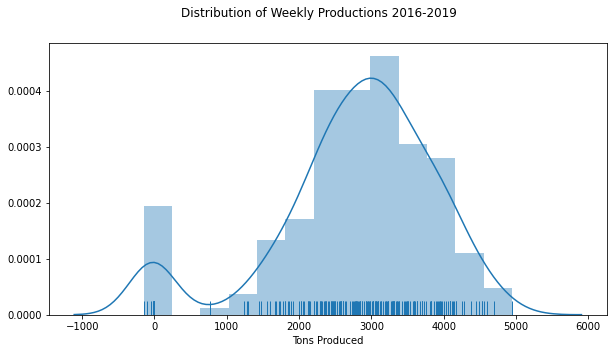

In [17]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Weekly Productions 2016-2019")
#Plotting fig
sns.distplot(weekly.resample('W', on='calendar_day').sum()['production_tons'], rug=True, axlabel="Tons Produced", ax=ax)

Average production around 3000, it seesm to be skewed left due to a lot of weeks having 0 production per a specific block

### Inventory

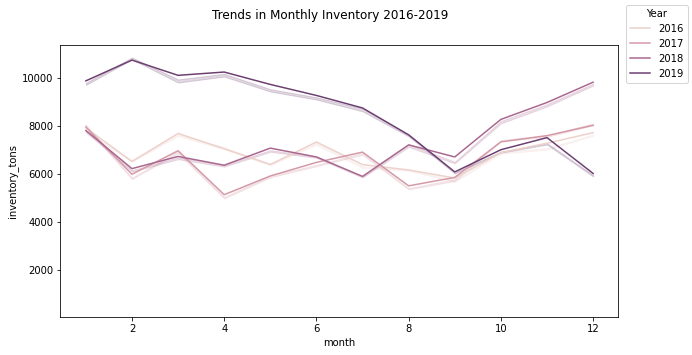

In [18]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Monthly Inventory 2016-2019")

#Plotting fig
sns.lineplot(x='month',
             y='inventory_tons',hue='year', 
             data=monthly,legend=False,ci=2)

fig.legend(title='Year', labels=[2016,2017,2018,2019])

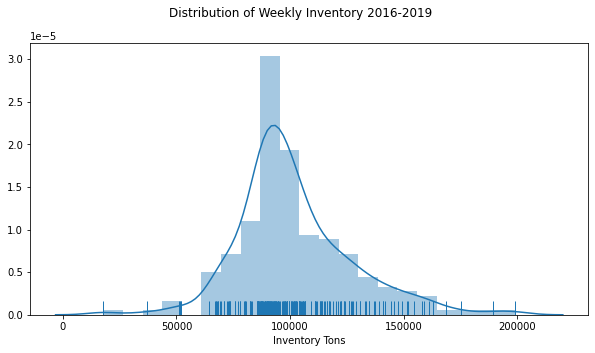

In [19]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Weekly Inventory 2016-2019")
#Plotting fig
sns.distplot(weekly.resample('W', on='calendar_day').sum()['inventory_tons'], rug=True, axlabel="Inventory Tons", ax=ax)

Inventory seems to be skewed right, with some higher amounts but with a weekly average of 100,000 tons

#### Inventory Cycle Example 4" ANG

In [20]:
block_df = structural[structural['block']=='4" ANG']

Text(0, 0.5, 'Tons')

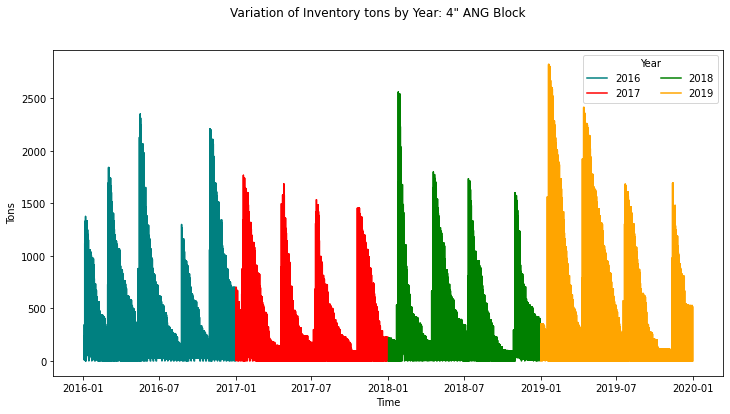

In [21]:
#creating df for each year
year_2016 = block_df[block_df.year == 2016]
year_2017 = block_df[block_df.year == 2017]
year_2018 = block_df[block_df.year == 2018]
year_2019 = block_df[block_df.year == 2019]

#Create figure and plots
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle('Variation of Inventory tons by Year: 4" ANG Block')

ax.plot(year_2016.calendar_day, year_2016["inventory_tons"], label=2016, color ='teal')
ax.plot(year_2017.calendar_day, year_2017["inventory_tons"], label=2017, color ='r')
ax.plot(year_2018.calendar_day, year_2018["inventory_tons"], label=2018, color ='g')
ax.plot(year_2019.calendar_day, year_2019["inventory_tons"], label=2019, color ='orange')

#Create legend & axis names
plt.legend(loc="best", title="Year", ncol=2)
ax.set_xlabel("Time")
ax.set_ylabel("Tons")

Invetory variations reflected above reflect the high increase during a new production cycle for that pertaining block and the continuous decrease in levels as the material is shipped off to customers.

### Sale Orders

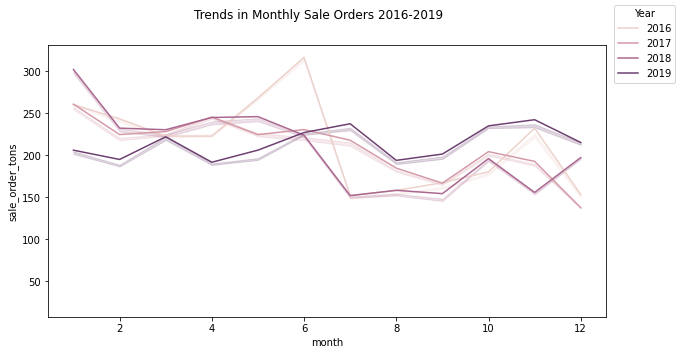

In [22]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Monthly Sale Orders 2016-2019")

#Plotting fig
sns.lineplot(x='month',
             y='sale_order_tons',hue='year', 
             data=monthly,legend=False,ci=2)

fig.legend(title='Year', labels=[2016,2017,2018,2019])

There seems to be a growing trend in 2019 for sale orders, otherwise similar pattern year to year

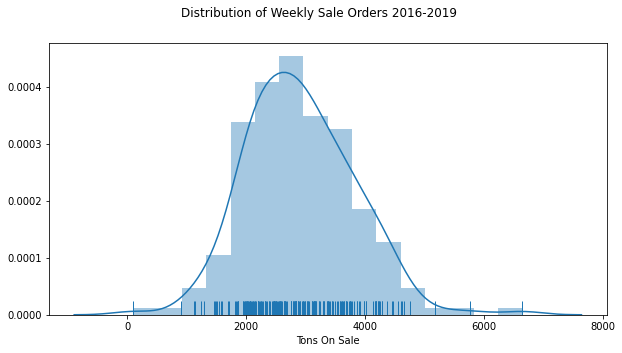

In [23]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Weekly Sale Orders 2016-2019")
#Plotting fig
sns.distplot(weekly.resample('W', on='calendar_day').sum()['sale_order_tons'], rug=True, axlabel="Tons On Sale", ax=ax)

Relatively normal distribution in orders

## Monthly Market Indicators
State & Local Construction Spending, Carbon Shipments Canada

### State & Local Construction Spending (in Billions)

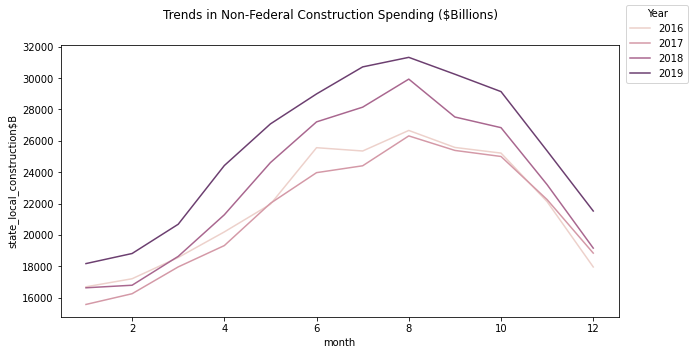

In [24]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Non-Federal Construction Spending ($Billions)")

#Plotting fig
sns.lineplot(x='month', hue='year',
             y='state_local_construction$B', 
             data=indicators,legend=False,ci=2)

fig.legend(title='Year', labels=[2016,2017,2018,2019])

There seems to be a cyclycallity spending. Summer-Fall seems to be months of higher spending in Construction

### MSCI Carbon Shipment Canada

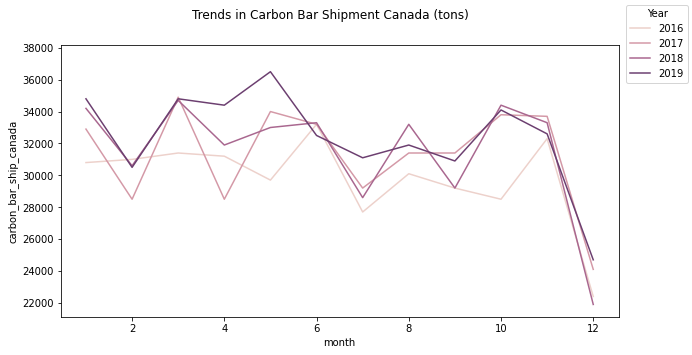

In [25]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Carbon Bar Shipment Canada (tons)")

#Plotting fig
sns.lineplot(x='month', hue='year',
             y='carbon_bar_ship_canada', 
             data=indicators,legend=False,ci=2)

fig.legend(title='Year', labels=[2016,2017,2018,2019])

Overall similar patterns in carbon bar shipments for Canada. The up-tick in Q2 2019 could be due to the tariffs